# Sheet 2: Comparing the **relative abundances** at the *Genus* level of the three conditions: LE, NL, HS

The data consists of **three folders**, each corresponding to a different sample type. Within each folder, there is one .xls file for each sample. Each file comprises a dataset organized into three columns:

1. **Domain**
2. **Phylum** or **Genus**
3. **Count**

The objective is to calculate the **relative abundances** of each phylum or genus separately for each sample type, and then visually compare these abundances by plotting them together to identify any differences.

For easier visualization of relative abundances at the *Genus* level, I will select the top 20 genera based on their relative abundance among Healthy Subjects and limit my analysis to these genera.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### **Step 1**: *Import the genera to be kept*

In [3]:
genera = pd.read_csv(r'C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\genera_to_keep.csv').iloc[:,0].tolist()

In [4]:
genera

['Propionibacterium',
 'Staphylococcus',
 'Sphingomonas',
 'Pseudomonas',
 'unclassified Bacteria',
 'unclassified Sphingomonadaceae',
 'Delftia',
 'Streptophyta',
 'Enhydrobacter',
 'Corynebacterium',
 'unclassified Pseudomonadaceae',
 'unclassified Actinomycetales',
 'Anaerobacillus',
 'Pelomonas',
 'Streptococcus',
 'unclassified Gammaproteobacteria',
 'Ralstonia',
 'unclassified Bacillales',
 'Microbacterium',
 'unclassified Proteobacteria']

In [5]:
folder_path_LE = r"C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\2023.05.03 - AD Lesion"
folder_path_NL = r"C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\2023.05.03 - AD Untreated"
folder_path_HS = r"C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\2023.05.03 - HS"

### **Step2**: *Concatenate the sample datasets*

In [6]:
def concat_excel_files(folder_path):
    dfs = []
    
    column_names = ['Genus', 'Count']

    # Loop over the files to import them one by one
    for filename in os.listdir(folder_path):
        if filename.endswith('.xls'):
            file_path = os.path.join(folder_path, filename)
            # Read the first sheet of the excel file, because I am working at the Phylum level
            df = pd.read_excel(file_path, sheet_name='Genus', header=None, names=column_names)
            # Add the 'sampleId' column with the filename
            df['SampleId'] = os.path.splitext(filename)[0]
            dfs.append(df)

    # Concatenate all dataframes into a single dataframe and rearrange
    final_df = pd.concat(dfs, ignore_index=True)
    cols = ['SampleId'] + [col for col in final_df.columns if col != 'SampleId']
    final_df = final_df[cols]

    # keep only the genera previously selected
    final_df = final_df[final_df['Genus'].isin(genera)]
    return final_df

final_df_LE = concat_excel_files(folder_path_LE)
final_df_NL = concat_excel_files(folder_path_NL)
final_df_HS = concat_excel_files(folder_path_HS)

In [7]:
final_df_LE.Genus.value_counts()

Genus
Staphylococcus                      16
Propionibacterium                   16
unclassified Proteobacteria         16
unclassified Gammaproteobacteria    16
unclassified Pseudomonadaceae       16
unclassified Actinomycetales        16
unclassified Bacillales             16
unclassified Sphingomonadaceae      16
unclassified Bacteria               16
Ralstonia                           16
Pseudomonas                         16
Pelomonas                           16
Sphingomonas                        16
Streptococcus                       15
Enhydrobacter                       14
Corynebacterium                     13
Microbacterium                      13
Streptophyta                        12
Anaerobacillus                       7
Delftia                              2
Name: count, dtype: int64

### **Step 3**: *Compute the relative abundances*

In [8]:
tot_values_LE = final_df_LE.groupby(by=['Genus'])['Count'].sum()/final_df_LE['Count'].sum()
tot_values_NL = final_df_NL.groupby(by=['Genus'])['Count'].sum()/final_df_NL['Count'].sum()
tot_values_HS = final_df_HS.groupby(by=['Genus'])['Count'].sum()/final_df_HS['Count'].sum()

In [9]:
tot_values_LE

Genus
Anaerobacillus                      0.001215
Corynebacterium                     0.072767
Delftia                             0.001096
Enhydrobacter                       0.051567
Microbacterium                      0.014073
Pelomonas                           0.028704
Propionibacterium                   0.079785
Pseudomonas                         0.066777
Ralstonia                           0.006626
Sphingomonas                        0.315452
Staphylococcus                      0.216913
Streptococcus                       0.012030
Streptophyta                        0.003231
unclassified Actinomycetales        0.012444
unclassified Bacillales             0.014451
unclassified Bacteria               0.058032
unclassified Gammaproteobacteria    0.006820
unclassified Proteobacteria         0.002961
unclassified Pseudomonadaceae       0.005480
unclassified Sphingomonadaceae      0.029576
Name: Count, dtype: float64

In [10]:
all_genera = tot_values_LE.index.union(tot_values_NL.index).union(tot_values_HS.index)

# Reindex each series to include all genera (might different among sample types, want to be sure to include them all)
tot_values_LE = tot_values_LE.reindex(all_genera, fill_value=0)
tot_values_NL = tot_values_NL.reindex(all_genera, fill_value=0)
tot_values_HS = tot_values_HS.reindex(all_genera, fill_value=0)

In [11]:
tot_values_LE

Genus
Anaerobacillus                      0.001215
Corynebacterium                     0.072767
Delftia                             0.001096
Enhydrobacter                       0.051567
Microbacterium                      0.014073
Pelomonas                           0.028704
Propionibacterium                   0.079785
Pseudomonas                         0.066777
Ralstonia                           0.006626
Sphingomonas                        0.315452
Staphylococcus                      0.216913
Streptococcus                       0.012030
Streptophyta                        0.003231
unclassified Actinomycetales        0.012444
unclassified Bacillales             0.014451
unclassified Bacteria               0.058032
unclassified Gammaproteobacteria    0.006820
unclassified Proteobacteria         0.002961
unclassified Pseudomonadaceae       0.005480
unclassified Sphingomonadaceae      0.029576
Name: Count, dtype: float64

### **Step 4**: *Concatenate the relative abundances of the three sample types*

In [12]:
tot_values_LE = tot_values_LE.reset_index()
tot_values_NL = tot_values_NL.reset_index()
tot_values_HS = tot_values_HS.reset_index()

tot_values_LE.columns = ['Genus', 'LE']
tot_values_NL.columns = ['Genus', 'NL']
tot_values_HS.columns = ['Genus', 'HS']

# Merge these DataFrames on the 'Phylum' column to align all the data
data = tot_values_LE.merge(tot_values_NL, on='Genus', how='outer').merge(tot_values_HS, on='Genus', how='outer')
data

,Genus,LE,NL,HS
0,Anaerobacillus,0.001215,0.001443,0.012886
1,Corynebacterium,0.072767,0.035091,0.018245
2,Delftia,0.001096,0.000200,0.024357
3,Enhydrobacter,0.051567,0.039911,0.020652
4,Microbacterium,0.014073,0.013758,0.004874
5,Pelomonas,0.028704,0.032151,0.011801
6,Propionibacterium,0.079785,0.053149,0.274036
7,Pseudomonas,0.066777,0.165141,0.085810
8,Ralstonia,0.006626,0.009950,0.007701
9,Sphingomonas,0.315452,0.398320,0.118092


In [13]:
data_transpose = data.T

# To set the name of the columns
data_transpose.columns = data_transpose.iloc[0]

# To remove the now redundant column
data_transpose = data_transpose.drop(data_transpose.index[0])
data_transpose

Genus,Anaerobacillus,Corynebacterium,Delftia,Enhydrobacter,Microbacterium,Pelomonas,Propionibacterium,Pseudomonas,Ralstonia,Sphingomonas,Staphylococcus,Streptococcus,Streptophyta,unclassified Actinomycetales,unclassified Bacillales,unclassified Bacteria,unclassified Gammaproteobacteria,unclassified Proteobacteria,unclassified Pseudomonadaceae,unclassified Sphingomonadaceae
LE,0.001215,0.072767,0.001096,0.051567,0.014073,0.028704,0.079785,0.066777,0.006626,0.315452,0.216913,0.01203,0.003231,0.012444,0.014451,0.058032,0.00682,0.002961,0.00548,0.029576
NL,0.001443,0.035091,0.0002,0.039911,0.013758,0.032151,0.053149,0.165141,0.00995,0.39832,0.098718,0.008249,0.021568,0.009624,0.003671,0.057884,0.007638,0.007634,0.008269,0.027633
HS,0.012886,0.018245,0.024357,0.020652,0.004874,0.011801,0.274036,0.08581,0.007701,0.118092,0.240904,0.010876,0.021717,0.014592,0.006591,0.059442,0.008808,0.004854,0.016,0.037762


In [14]:
data_transpose.sum(axis = 1)

LE    1.0
NL    1.0
HS    1.0
dtype: object

### Finally plot!

In [15]:
palette = ["#a0e85b", "#30766a", "#36edd3", "#359721", "#a2e0dd", "#333a9e", "#1a86e3", "#e3a0fa", "#8c0250", "#fa41c7", "#4f8c9d", "#8c0da4", "#d5d0fa", "#5f5c6f", "#562fff", "#3ff44c", "#6e390d", "#fca552", "#d6061a", "#fb899b", "#d6da7d"]

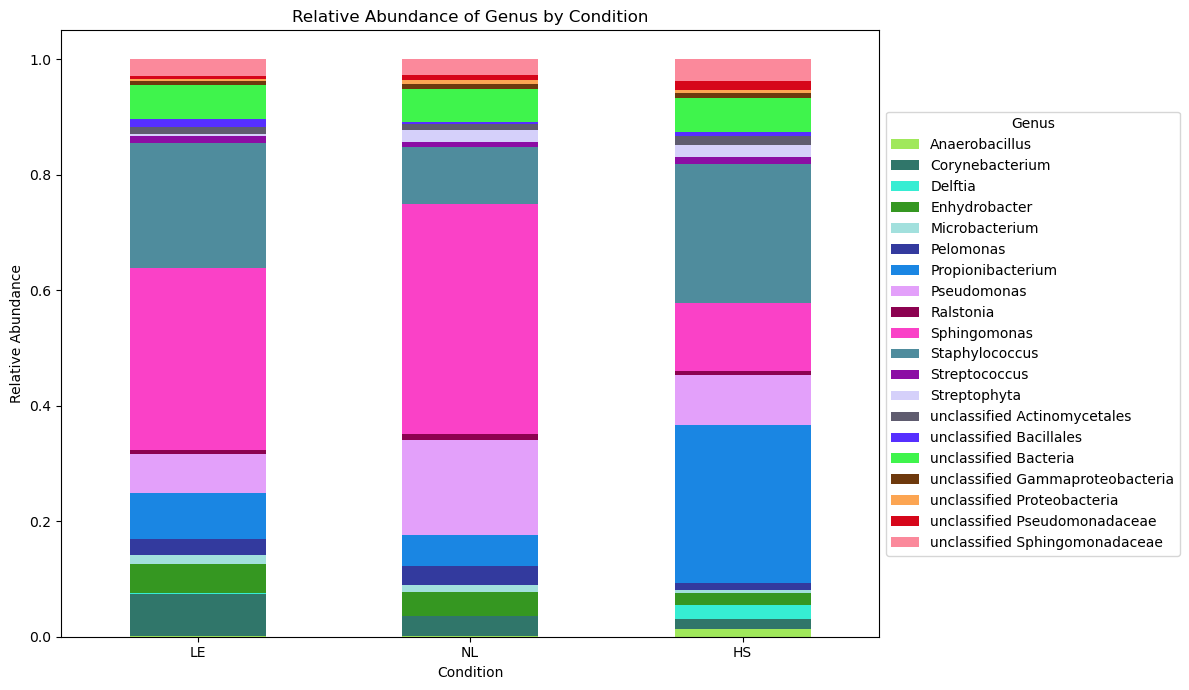

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
data_transpose.plot(kind='bar', stacked=True, ax=ax, color=palette)

ax.set_xlabel('Condition')
ax.set_ylabel('Relative Abundance')
ax.set_title('Relative Abundance of Genus by Condition')

plt.xticks(rotation=0)

ax.legend(title='Genus', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()